<a href="https://colab.research.google.com/github/Rahul2661998/Churn-Analysis-Teleco-Customer-Dataset/blob/main/Assignment_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data=pd.read_csv("/content/drive/MyDrive/Classification models/Copy of WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [8]:
# Converting TotalCharges into numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


# **EDA**

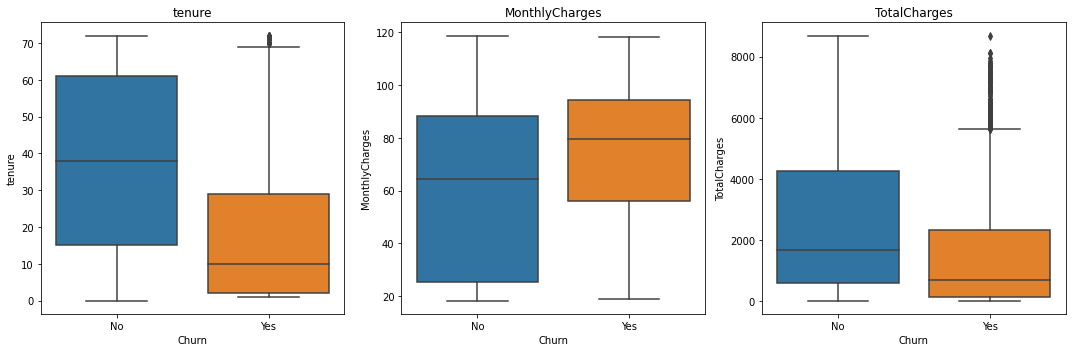

In [9]:
# Checking continuous variables
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("tenure")
sns.boxplot(data=data, y = 'tenure', x = 'Churn')

plt.subplot(1,3,2)
plt.title("MonthlyCharges")
sns.boxplot(data=data, y = 'MonthlyCharges', x = 'Churn')

plt.subplot(1,3,3)
plt.title("TotalCharges")
sns.boxplot(data=data, y = 'TotalCharges', x = 'Churn')

plt.tight_layout()
plt.show()

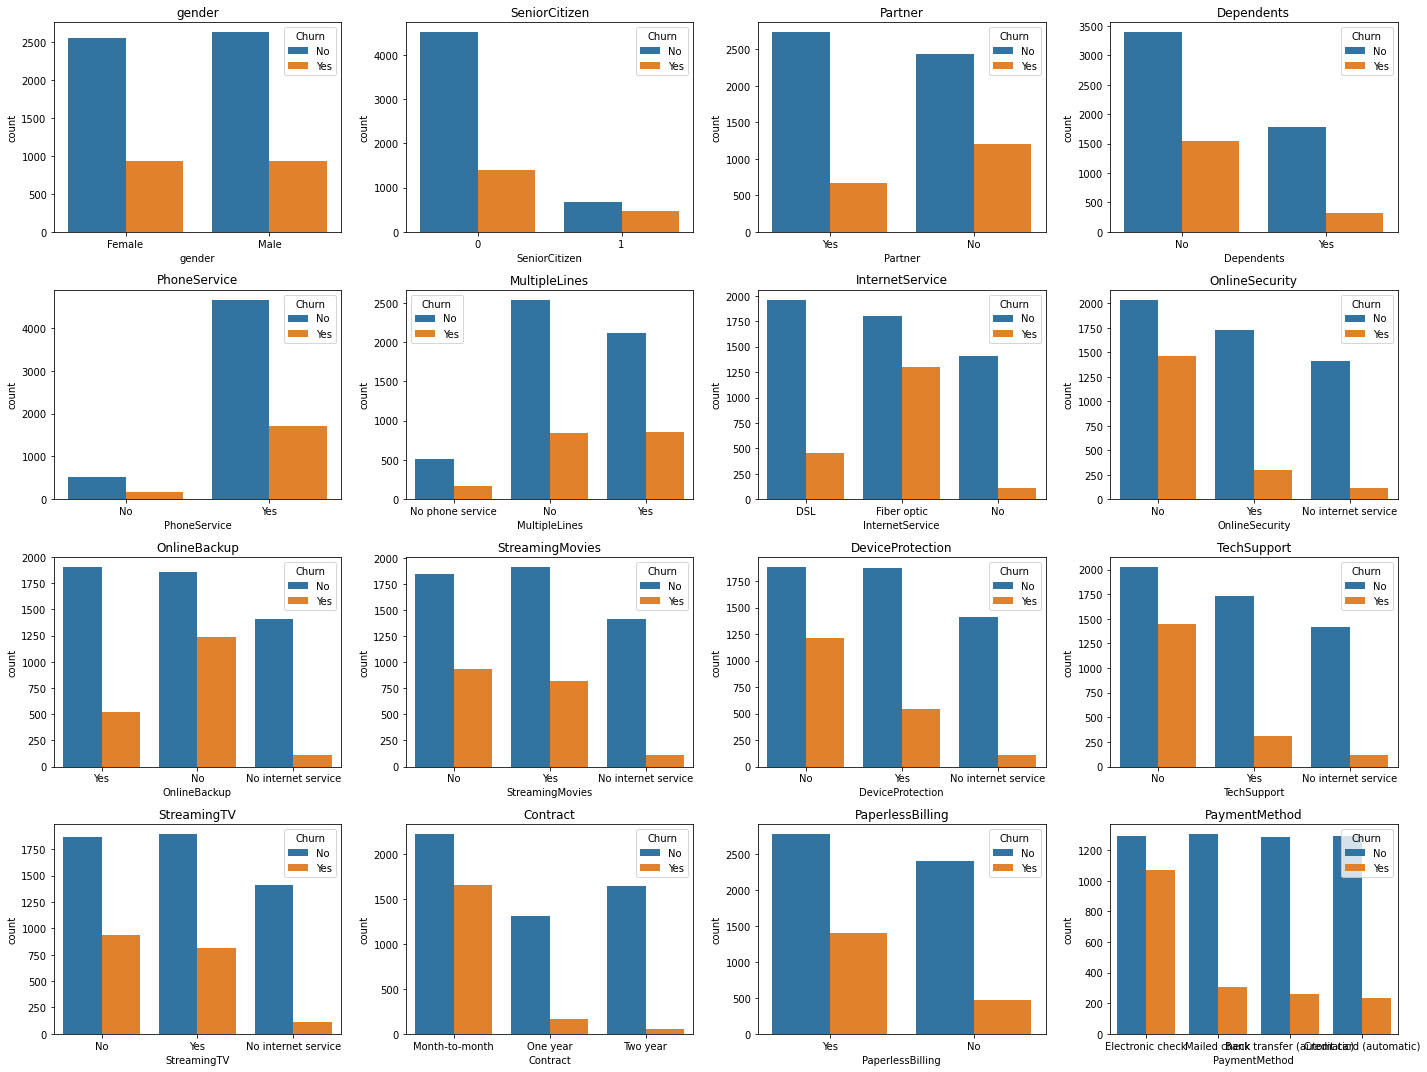

In [10]:
fig = plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
plt.title("gender")
sns.countplot(data=data, x = 'gender', hue='Churn')

plt.subplot(4,4,2)
plt.title("SeniorCitizen")
sns.countplot(data=data, x = 'SeniorCitizen', hue = 'Churn')

plt.subplot(4,4,3)
plt.title("Partner")
sns.countplot(data=data, x = 'Partner', hue = 'Churn')

plt.subplot(4,4,4)
plt.title("Dependents")
sns.countplot(data=data, x = 'Dependents', hue = 'Churn')

plt.subplot(4,4,5)
plt.title("PhoneService")
sns.countplot(data=data, x = 'PhoneService', hue = 'Churn')

plt.subplot(4,4,6)
plt.title("MultipleLines")
sns.countplot(data=data, x = 'MultipleLines', hue = 'Churn')

plt.subplot(4,4,7)
plt.title("InternetService")
sns.countplot(data=data, x = 'InternetService', hue = 'Churn')

plt.subplot(4,4,8)
plt.title("OnlineSecurity")
sns.countplot(data=data, x = 'OnlineSecurity', hue = 'Churn')

plt.subplot(4,4,9)
plt.title("OnlineBackup")
sns.countplot(data=data, x = 'OnlineBackup', hue = 'Churn')

plt.subplot(4,4,10)
plt.title("StreamingMovies")
sns.countplot(data=data, x = 'StreamingMovies', hue = 'Churn')

plt.subplot(4,4,11)
plt.title("DeviceProtection")
sns.countplot(data=data, x = 'DeviceProtection', hue = 'Churn')

plt.subplot(4,4,12)
plt.title("TechSupport")
sns.countplot(data=data, x = 'TechSupport', hue = 'Churn')

plt.subplot(4,4,13)
plt.title("StreamingTV")
sns.countplot(data=data, x = 'StreamingTV', hue = 'Churn')

plt.subplot(4,4,14)
plt.title("Contract")
sns.countplot(data=data, x = 'Contract', hue = 'Churn')

plt.subplot(4,4,15)
plt.title("PaperlessBilling")
sns.countplot(data=data, x = 'PaperlessBilling', hue = 'Churn')

plt.subplot(4,4,16)
plt.title("PaymentMethod")
sns.countplot(data=data, x = 'PaymentMethod', hue = 'Churn')


plt.tight_layout()
plt.show()

In [11]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data=data.dropna()

In [13]:
vif_data=data[['SeniorCitizen','tenure','MonthlyCharges']]

In [14]:
pd.DataFrame({'feature':vif_data.columns, 'VIF':[variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])]})

,feature,VIF
0,SeniorCitizen,1.256633
1,tenure,2.620398
2,MonthlyCharges,2.928852


We removed TotalCharges after the VIF analysis

VIF Threshold is 5 

In [15]:
# Converting Churn YES into 1 and Churn NO into 0
data['Class']=data['Churn'].map({'Yes': 1, 'No': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
y=data['Class'].copy()
input=data.drop(['customerID','TotalCharges','Class','Churn'],axis=1).copy()

In [17]:
X=pd.get_dummies(input)

In [18]:
X.shape

(7032, 44)

## Normalization

In [19]:
scaler=MinMaxScaler()
scaler.fit(X)
x=scaler.transform(X)

## Splitting dataset into Train and Test

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [21]:
y_train.value_counts()

0    4130
1    1495
Name: Class, dtype: int64

In [22]:
y_test.value_counts()

0    1033
1     374
Name: Class, dtype: int64

## Training Our Model

In [23]:
logit = LogisticRegression(fit_intercept=True, max_iter=10000)
logit.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [24]:
# value of coeficients
logit.coef_

array([[ 0.18869201, -2.25478919, -0.33846672,  0.01181811, -0.0111341 ,
         0.01741424, -0.01673024,  0.1214331 , -0.1207491 ,  0.07721099,
        -0.07652699, -0.21219236,  0.07721099,  0.13566537, -0.42694237,
         0.55212298, -0.12449661,  0.25813143, -0.12449661, -0.13295082,
         0.13184929, -0.12449661, -0.00666868,  0.03199212, -0.12449661,
         0.09318848,  0.23487424, -0.12449661, -0.10969363, -0.10283324,
        -0.12449661,  0.22801385, -0.08942293, -0.12449661,  0.21460354,
         0.72041532, -0.05136029, -0.66837102, -0.14373712,  0.14442112,
        -0.14295198, -0.09755733,  0.25370378, -0.01251046]])

In [25]:
# Intercept
logit.intercept_

array([-1.01738815])

##**Lets Evaluate the Performance of Our Model**

In [26]:
# Getting the predicted probabilities
train_pred_prob=logit.predict_proba(x_train)[:,1]
test_pred_prob=logit.predict_proba(x_test)[:,1]

In [27]:
train_pred_prob

array([0.01626665, 0.26825958, 0.02856356, ..., 0.0388362 , 0.17753176,
       0.78638912])

In [28]:
test_pred_prob

array([0.01983829, 0.59841625, 0.01055108, ..., 0.11538515, 0.03466955,
       0.0086519 ])

In [29]:
# Get the predicted classes
train_class_preds = logit.predict(x_train)
test_class_preds = logit.predict(x_test)

In [30]:
train_class_preds

array([0, 0, 0, ..., 0, 0, 1])

In [31]:
test_class_preds

array([0, 1, 0, ..., 0, 0, 0])

## Lets take a look at the Evaluation matrix


[[3706  424]
 [ 681  814]]
[[913 120]
 [158 216]]


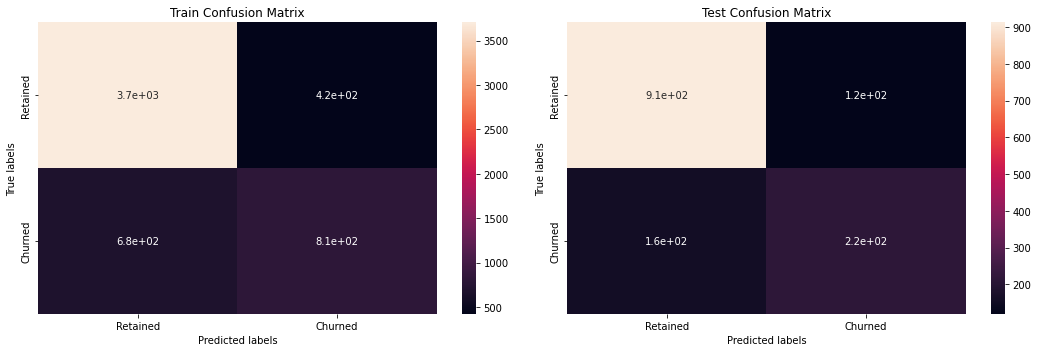

In [33]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Train Confusion Matrix")
labels = ['Retained', 'Churned']
cm_train = confusion_matrix(y_train, train_class_preds)
print(cm_train)
sns.heatmap(cm_train, annot=True) #annot=True to annotate cells
# labels and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0.5,1.5],labels)
plt.yticks([0.5,1.5],labels)

plt.subplot(1,2,2)
plt.title("Test Confusion Matrix")
labels = ['Retained', 'Churned']
cm_test = confusion_matrix(y_test, test_class_preds)
print(cm_test)
sns.heatmap(cm_test, annot=True) #annot=True to annotate cells
# labels and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0.5,1.5],labels)
plt.yticks([0.5,1.5],labels)

plt.tight_layout()
plt.show()


## **Accuracy**

In [44]:
accuracy_train=accuracy_score(y_train, train_class_preds)
accuracy_train

0.8035555555555556

In [45]:
accuracy_test=accuracy_score(y_test, test_class_preds)
accuracy_test

0.8024164889836531

##**Precision**
Precision: The ability of a classification model to identify only the relevant data points. Mathematically, precision the **number of true positives divided by the number of true positives plus the number of false positives.**

In [34]:
precision_train=cm_train[1,1]/(cm_train[1,1]+cm_train[0,1])
precision_train

0.6575121163166397

In [35]:
precision_test=cm_test[1,1]/(cm_test[1,1]+cm_test[0,1])
precision_test

0.6428571428571429

## **Recall**
Recall: The ability of a model to find all the relevant cases within a data set. Mathematically, we define recall as the **number of true positives divided by the number of true positives plus the number of false negatives.**

In [36]:
recall_train=cm_train[1,1]/(cm_train[1,1]+cm_train[1,0])
recall_train

0.5444816053511705

In [37]:
recall_test=cm_test[1,1]/(cm_test[1,1]+cm_test[1,0])
recall_test

0.5775401069518716

## **F1- Score**
**F1 = 2$ * $(precision$ * $recall) / (precision + recall)**

In [38]:
f1_score_train=f1_score(y_train, train_class_preds)
f1_score_train

0.5956824002927186

In [39]:
f1_score_test=f1_score(y_test, test_class_preds)
f1_score_test

0.6084507042253521

## **Log-Loss**
\begin{align*}
  Log Loss &= \sum_{i=1}^{M} [ y^{i}log(P^{i}) + (1- y^{i})log(1 - P^{i} )]\\
\end{align*}

In [40]:
log_loss_train=log_loss(y_train,train_class_preds)
log_loss_train

6.7850110125665255

In [41]:
log_loss_test=log_loss(y_test,test_class_preds)
log_loss_test

6.824360902257848

## **ROC-AUC**

In [42]:
train_auc=roc_auc_score(y_train,train_pred_prob)
train_auc

0.8486424481929271

In [43]:
test_auc=roc_auc_score(y_test,test_pred_prob)
test_auc

0.8333872579217378

## <b><u>Implementing Cross-validated Logistic Regression

In [67]:
logistic = LogisticRegression()

In [68]:
scoring = ['accuracy']
c_values = {'C':[100, 10, 1.0, 0.1, 0.01]}
scores = cross_validate(logistic,x_train, y_train , scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.808, test=0.784) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.801, test=0.822) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.804, test=0.804) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV] END ................ accuracy: (train=0.807, test=0.788) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.799, test=0.808) total time=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [49]:
scores['train_accuracy']

array([0.80866667, 0.80177778, 0.80622222, 0.80777778, 0.80244444])

In [50]:
scores['test_accuracy']

array([0.78488889, 0.82044444, 0.8       , 0.78844444, 0.808     ])

In [51]:
scores['estimator']

[LogisticRegressionCV(),
 LogisticRegressionCV(),
 LogisticRegressionCV(),
 LogisticRegressionCV(),
 LogisticRegressionCV()]

In [52]:
for model in scores['estimator']:
    print(model.coef_)

[[ 0.16715593 -2.42812819 -7.1425469   0.20404286  0.14883557  0.18228172
   0.17059672  0.27160719  0.08127125 -0.19149766  0.5443761  -0.06535609
  -0.19149766  0.60973219 -1.01921153  1.74921659 -0.37712662  0.38274588
  -0.37712662  0.34725917  0.23842165 -0.37712662  0.49158341  0.17683712
  -0.37712662  0.55316793  0.37845211 -0.37712662  0.35155294 -0.15273185
  -0.37712662  0.8827369  -0.16888353 -0.37712662  0.89888859  0.89864729
   0.06386934 -0.6096382   0.06033713  0.29254131 -0.07321045  0.04481137
   0.29640359  0.08487393]]
[[ 0.18724733 -2.29741414 -1.89223518  0.06261865  0.03783714  0.06688993
   0.03356585  0.19283583 -0.09238005  0.03384436  0.06661143 -0.1567188
   0.03384436  0.22333023 -0.53957212  0.82787563 -0.18784772  0.25090233
  -0.18784772  0.03740118  0.17328844 -0.18784772  0.11501507  0.07277008
  -0.18784772  0.21553343  0.24286387 -0.18784772  0.04543964 -0.14639964
  -0.18784772  0.43470315 -0.07696238 -0.18784772  0.36526588  0.70551176
   0.029587